### Contents

* [Reading dataset](#Reading-dataset)

    * [Sorting data by date_of_creation](#Sorting-data-by-date_of_creation)

* [Unique value stats for summarizing the data](#Unique-value-stats-for-summarizing-the-data)    
    * [Summarizing training dataset](#Summarizing-training-dataset:)

* [Data Preparation](#Data-Preparation)
    * [Fixing the ambiguous values in designation column](#Fixing-the-ambiguous-values-in-designation-column)
    * [Fixing the ambiguous values in resource column](#Fixing-the-ambiguous-values-in-resource-column)
    * [Fixing the ambiguous values in last_lead_update column](#Fixing-the-ambiguous-values-in-last_lead_update-column)

* [Missing value analysis](#Missing-value-analysis)
    * [Missing value stats by columns](#Missing-value-stats-by-columns)
    * [Filling missing values of geography column](#Filling-missing-values-of-geography-column)
    * [Filling missing values of weighted_amount column](#Filling-missing-values-of-weighted_amount-column)
    * [Filling missing values of deal_value column](#Filling-missing-values-of-deal_value-column)

In [1]:
from utils import *
from fill_missing import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import joblib

pd.set_option('display.max_columns', 50)

## Reading dataset

In [2]:
df_train = pd.read_csv('data/cleaned/train.csv', 
                       parse_dates=['date_of_creation'])

display(df_train.head())

,industry,deal_value,weighted_amount,date_of_creation,pitch,lead_revenue,fund_category,geography,location,poc_name,designation,hiring_candidate_role,lead_source,level_of_meeting,last_lead_update,internal_poc,resource,internal_rating,success_probability
0,Restaurants,320506.0,2067263.7,2020-03-29,Product_2,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,Construction Services,39488.0,240876.8,2019-07-10,Product_2,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,Hospitals/Clinics,359392.0,2407926.4,2019-07-27,Product_1,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,Real Estate,76774.0,468321.4,2021-01-30,Product_2,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Financial Services,483896.0,NaN,2019-05-22,Product_2,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


### Sorting data by `date_of_creation`

In [3]:
df_train = df_train.sort_values(by='date_of_creation')
df_train.reset_index(drop=True, inplace=True)

#### Inspecting head and tail of the sorted data

In [4]:
df_train.head()

,industry,deal_value,weighted_amount,date_of_creation,pitch,lead_revenue,fund_category,geography,location,poc_name,designation,hiring_candidate_role,lead_source,level_of_meeting,last_lead_update,internal_poc,resource,internal_rating,success_probability
0,Technology Consulting,326636.0,1959816.0,2019-01-01,Product_1,100 - 500 Million,Category 3,India,Brahmapur,gaytri bai,Chairman/Chief Innovation Officer,"Editor, commissioning",Others,Level 2,more than a month,"Dyson,William A",Deliverable,5,62.70
1,Other,64710.0,423850.5,2019-01-01,Product_1,50 - 100 Million,Category 4,India,Kavaratti,kamini,SVP/General Counsel,Community development worker,Marketing Event,Level 2,Pending,"Massiah,Gerard F",We have all the requirements,5,61.70
2,Hospitals/Clinics,170420.0,1073646.0,2019-01-01,Product_1,500 Million - 1 Billion,Category 1,India,Muzaffarpur,puja,Vice President / GM (04-present) : VP Sales an...,Hydrologist,Others,Level 2,Pending,"Sutton,Michelle R",No,3,107.34
3,Banks,480392.0,2906371.6,2019-01-01,Product_1,500 Million - 1 Billion,Category 3,India,Kavaratti,poonam,CEO/Co-Founder/Chairman,Office manager,Others,Level 3,More than a week back,"Van Arter,Derrick",No,1,61.50
4,Banks,261734.0,1583490.7,2019-01-01,Product_1,50 - 100 Million,Category 3,India,Mahabubnagar,alisha loomba,Chairman/Chief Innovation Officer,Manufacturing engineer,Marketing Event,Level 1,Did not hear back after Level 1,"Charles,Caleb",No,5,26.35


In [5]:
df_train.tail()

,industry,deal_value,weighted_amount,date_of_creation,pitch,lead_revenue,fund_category,geography,location,poc_name,designation,hiring_candidate_role,lead_source,level_of_meeting,last_lead_update,internal_poc,resource,internal_rating,success_probability
7002,Materials/Manufacturing,45251.0,257930.70,2021-02-15,Product_1,50 - 100 Million,Category 2,India,Cuttack,khushboo khan,CEO/Co-Founder/Chairman,Medical technical officer,Others,Level 3,Pending,"Gaskins Jr,Franklin D",Yes,4,61.3
7003,Financial Services,52662.0,284374.80,2021-02-15,Product_1,100 - 500 Million,Category 2,USA,"Greenville-Anderson-Mauldin, SC",Chad Brown,SVP/General Counsel,English as a second language teacher,Others,Level 1,Did not hear back after Level 1,"Green,Candy",Yes,1,62.2
7004,Restaurants,326727.0,2025707.40,2021-02-15,Product_2,50 - 100 Million,Category 3,India,Tezpur,ambika,CEO,"Radiographer, diagnostic",Contact Email,Level 3,More than a week back,"Heidelberg,Andre D",Deliverable,4,61.5
7005,Conglomerates,487253.0,3142781.85,2021-02-15,Product_1,500 Million - 1 Billion,Category 3,India,Vishakhapatnam,deeksha,Chairman/Chief Innovation Officer,Commercial/residential surveyor,Marketing Event,Level 3,More than a week back,"Ryker,David",Not enough,1,63.5
7006,Recreational Products,167888.0,990539.20,2021-02-15,Product_1,500 Million - 1 Billion,Category 3,NaN,Ajmer,rakhi soni,CEO,Bonds trader,Others,Level 2,More than 2 weeks,"Heidelberg,Andre D",Cannot deliver,4,62.0


## Unique value stats for summarizing the data

In [6]:
df_train_nunique = unique_value_stats(df_train)

display(df_train_nunique)

,column,unique_value_count
0,industry,171
1,deal_value,6907
2,weighted_amount,6480
3,date_of_creation,777
4,pitch,2
5,lead_revenue,3
6,fund_category,4
7,geography,2
8,location,597
9,poc_name,5261


### Summarizing training dataset:

* The data is collected from 01 Jan 2019 to 15 Feb 2021


* There are 171 industries in the data


* Lead was generated for two products i.e. `Product_1` and `Product_2`


* The revenue of the lead's organization can lie in the following range:

```python
['50 - 100 Million', '100 - 500 Million', '500 Million - 1 Billion']
```
    
* Funding category can be `['Category 1', 'Category 2', 'Category 3', 'Category 4']`


* Leads belong to two countries i.e. `USA` and `India`


* Designation has the following values:

```python
['Chairman/Chief Innovation Officer', 'SVP/General Counsel ',
 'Vice President / GM (04-present) : VP Sales and Marketing (01-04)',
 'CEO/Co-Founder/Chairman', 'CEO/Chairman/President',
 'Chairman/CEO/President', 'CEO', 'CEO/President',
 'Chief Executive Officer', 'Executive Vice President'
]
```

Looks like `designation` column has some ambiguities such as `CEO` or `Chief Executive Officer`


* The lead can come from the following sources:

```python
['Contact Email', 'Website', 'Marketing Event', 'Others']
```

* The level of meeting is defined [here](https://github.com/sank3t/Reduce-Marketing-Spend#call-level)


* The lead update has following values:

```python
['more than a month',
 'Pending',
 'More than a week back',
 'Did not hear back after Level 1',
 '?',
 'Up-to-date',
 '2 days back',
 '5 days back',
 'No track',
 'Following up but lead not responding',
 'More than 2 weeks'
 ]
 ```
 
 * The availability of resource can have following values:
 
```python
 ['Deliverable', 'We have all the requirements', 
  'No', 'Not enough',
  'Cannot deliver', 'Yes'
 ]
```

* The lead is rated on a scale of **1 to 5**

#### Interesting fact 🙂

The leads from India have their `poc_name` in lower case.

## Data Preparation

### Fixing the ambiguous values in `designation` column

In [7]:
designation_dict = {
    'Chairman/Chief Innovation Officer': 'CEO',
    'CEO/Co-Founder/Chairman': 'CEO',
    'CEO/Chairman/President': 'CEO',
    'Chairman/CEO/President': 'CEO',
    'CEO/President': 'CEO',
    'Chief Executive Officer': 'CEO',
    'Vice President / GM (04-present) : VP Sales and Marketing (01-04)': 'SVP/General Counsel',
    'Executive Vice President': 'SVP/General Counsel'
}

df_train = df_train.replace({'designation': designation_dict})
df_train['designation'] = df_train['designation'].str.strip()

In [8]:
df_train['designation'].unique()

array(['CEO', 'SVP/General Counsel'], dtype=object)

### Fixing the ambiguous values in `resource` column

In [9]:
resource_dict = {
    'Deliverable': 'Yes',
    'We have all the requirements': 'Yes',
    'Not enough': 'No',
    'Cannot deliver': 'No'
}

df_train = df_train.replace({'resource': resource_dict})
df_train['resource'] = df_train['resource'].str.strip()

### Fixing the ambiguous values in `last_lead_update` column

In [10]:
last_lead_update_dict = {
    'Following up but lead not responding' : 'No track',
    'More than a month': 'No track',
    'Did not hear back after Level 1': 'No track',
    'Pending': 'No track'
}

df_train = df_train.replace({'last_lead_update': last_lead_update_dict})
df_train['last_lead_update'] = df_train['last_lead_update'].str.strip()

## Missing value analysis

### Missing value stats by columns

In [11]:
df_train_missing = missing_value_stats(df_train)

display(df_train_missing)

,column,missing_values,missing_percentage
0,industry,1,0.01
1,deal_value,51,0.73
2,weighted_amount,525,7.49
3,geography,972,13.87
4,location,11,0.16
5,poc_name,8,0.11
6,last_lead_update,633,9.03
7,resource,149,2.13


### Filling missing values of `geography` column

In [12]:
# Getting non null values of poc_name
temp_poc = df_train.loc[~df_train['poc_name'].isna(), ['geography', 'poc_name']]

# Checking where poc_name are in lower cases
temp_poc['is_lower'] = temp_poc['poc_name'].str.islower()

#### Inspecting geographies by case of poc_name

In [13]:
# Geographies having poc_name in lower case
temp_poc[temp_poc['is_lower'] == True]['geography'].unique().tolist()

['India', nan]

In [14]:
# Geographies having poc_name in upper case
temp_poc[temp_poc['is_lower'] == False]['geography'].unique().tolist()

[nan, 'USA', 'India']

Wait a sec for a lead belongs to **India** the names are both in lower and upper case.

In [15]:
temp_poc[(temp_poc['is_lower'] == False) & (temp_poc['geography'] == 'India')]

,geography,poc_name,is_lower
603,India,कु0 भावना,False
931,India,जशोदा,False
2046,India,सानिया,False
2342,India,नसीम,False
4064,India,सलमा,False
4118,India,सोनिया,False
5287,India,लक्ष्‍मी,False
5702,India,नसीम,False
5876,India,शारदा बे,False
6058,India,यशोदा,False


As Hindi names can't be checked for lower case. This proves that leads from India has their `poc_name` in lower case.

In [16]:
df_train['geography'] = df_train['geography'].fillna(
    df_train['poc_name'].apply(lambda name: fill_geography(check_case(name)))
)

### Filling missing values of `weighted_amount` column

#### Checking correlation between features

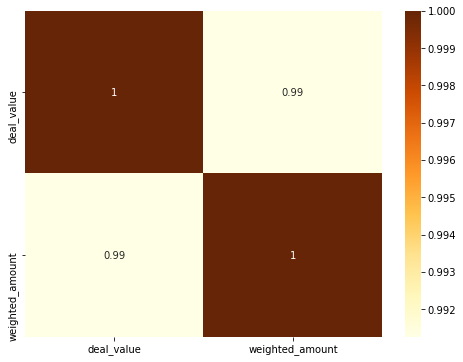

In [17]:
plt.figure(figsize=(8, 6))

sns.heatmap(df_train[['deal_value', 'weighted_amount']].corr(),
            annot=True, cmap='YlOrBr')
plt.show()

**Conclusion:**

* The `deal_value` and `weighted_amount` are highly positively correlated


* After observing the missing value stats [here](#Missing-value-stats-by-columns), the column `weighted_amount` has more missing values than `deal_value`.

    Since, these two columns are highly correlated, `deal_value` will first be used for imputing the missing `weighted_amount` using the _linear regression_ technique.
    
    
* Once the `weighted_amount` is imputed the missing `deal_value` will be imputed using the following equation:

    $probability =  \frac{weighted\_amount}{deal\_value}$
    
    Then calculating the median value of probability by grouping the industry and product pitched.

In [18]:
# Filtering the not null values for fitting the Linear Regression
filter1 = (~df_train['deal_value'].isna()) & (~df_train['weighted_amount'].isna())
deal_weighted_not_null_df = df_train.loc[filter1, ['deal_value', 'weighted_amount']]

deal_value_train = deal_weighted_not_null_df['deal_value'].values.reshape(-1, 1)
weighted_amount_train = deal_weighted_not_null_df['weighted_amount'].values.reshape(-1, 1)

# Filtering the not null deal_value and null weighted_amount for imputation
filter2 = (~df_train['deal_value'].isna()) & (df_train['weighted_amount'].isna())
weighted_null_df = df_train.loc[filter2, 'deal_value']
weighted_null_indices = weighted_null_df.index.tolist()

deal_value_test = weighted_null_df.values.reshape(-1, 1)

# Initializing and fitting the model
lin_reg = LinearRegression()
model = lin_reg.fit(deal_value_train, weighted_amount_train)

# Predicting null weighted amount
weighted_amount_pred = model.predict(deal_value_test).reshape(len(weighted_null_indices))

# Replacing null weighted amount
df_train.loc[weighted_null_indices, 'weighted_amount'] = weighted_amount_pred

#### Saving the model

In [19]:
joblib.dump(model, 'imputer/weighted_amount_imputer.pkl')

['imputer/weighted_amount_imputer.pkl']

### Filling missing values of `deal_value` column

In [20]:
df_train['probability'] = df_train['weighted_amount'] / df_train['deal_value']
industry_prob_by_product = df_train.groupby(['industry', 'pitch'])['probability'].agg({'median'}).reset_index()

industry_prob_by_product.head()

,industry,pitch,median
0,Accounting,Product_1,5.85000
1,Advertising/PR,Product_1,6.60351
2,Advertising/PR,Product_2,6.12500
3,Aerospace/Defense,Product_1,6.40000
4,Aerospace/Defense,Product_2,6.15000


In [21]:
filter3 = (df_train['deal_value'].isna()) & (~df_train['weighted_amount'].isna())

deal_value_null_df = df_train.loc[filter3, ['industry', 'deal_value', 'weighted_amount', 'pitch']]
deal_value_null_indices = deal_value_null_df.index.tolist()

deal_value_filled = fill_deal_value(deal_value_null_df, industry_prob_by_product)
df_train.loc[deal_value_null_indices, 'deal_value'] = deal_value_filled

In [22]:
industry_prob_by_product.to_csv('imputer/industry_proba.csv', index=False)

#### Dropping rows where `deal_value` and `weighted_amount` is null

In [23]:
df_train[(df_train['deal_value'].isna()) & (df_train['weighted_amount'].isna())]

,industry,deal_value,weighted_amount,date_of_creation,pitch,lead_revenue,fund_category,geography,location,poc_name,designation,hiring_candidate_role,lead_source,level_of_meeting,last_lead_update,internal_poc,resource,internal_rating,success_probability,probability
3067,Financial Services,NaN,NaN,2019-12-07,Product_1,500 Million - 1 Billion,Category 4,India,Kalyan,mohni,CEO,Chartered accountant,Website,Level 2,No track,"Featherstone,Adrian R",No,1,107.34,NaN
4607,Real Estate,NaN,NaN,2020-05-23,Product_2,100 - 500 Million,Category 2,India,Alipurduar,kirti,CEO,Optometrist,Website,Level 1,NaN,"Shelton,Sidney P",No,3,62.70,NaN
5248,Banks,NaN,NaN,2020-08-02,Product_2,100 - 500 Million,Category 2,USA,"Detroit-Warren-Dearborn, MI",Rachel Marsh,SVP/General Counsel,Broadcast presenter,Contact Email,Level 1,More than 2 weeks,"Shelton,Sidney P",Yes,1,62.90,NaN
6340,Insurance,NaN,NaN,2020-12-05,Product_1,50 - 100 Million,Category 3,India,Rajkot,priya,CEO,Best boy,Others,Level 2,No track,"Mabrey,Kevin C",No,1,53.90,NaN


In [24]:
df_train = df_train.drop(columns=['probability'])

df_train = df_train[(~df_train['deal_value'].isna()) & (~df_train['weighted_amount'].isna())]

### Filling missing values of `resource` column

In [25]:
df_train.resource.value_counts(normalize=True)

No     0.501021
Yes    0.498979
Name: resource, dtype: float64

In [26]:
df_train[df_train.resource.isna()]

,industry,deal_value,weighted_amount,date_of_creation,pitch,lead_revenue,fund_category,geography,location,poc_name,designation,hiring_candidate_role,lead_source,level_of_meeting,last_lead_update,internal_poc,resource,internal_rating,success_probability
17,Banks,375559.0,2.384800e+06,2019-01-03,Product_1,50 - 100 Million,Category 3,India,Saidapur,renu,CEO,Travel agency manager,Website,Level 3,more than a month,"Turner,Marlon D",NaN,3,26.35
22,Insurance,437361.0,2.558562e+06,2019-01-03,Product_1,50 - 100 Million,Category 3,USA,"Cedar Rapids, IA",Monica Bryan,CEO,Farm manager,Contact Email,Level 1,more than a month,"Dimattia,Frank D",NaN,4,64.10
75,Other Investment Firms,333185.0,2.382273e+06,2019-01-09,Product_1,100 - 500 Million,Category 1,USA,"Kingsport-Bristol-Bristol, TN-VA",Susan Nichols,SVP/General Counsel,Arts administrator,Contact Email,Level 3,more than a month,"Booker,David L",NaN,5,74.10
135,Water Utilities,242256.0,1.707905e+06,2019-01-16,Product_2,500 Million - 1 Billion,Category 1,USA,"Shreveport-Bossier City, LA",Nicholas Kaiser,SVP/General Counsel,"Engineer, automotive",Marketing Event,Level 3,No track,"Robinson,John C",NaN,1,73.50
148,Associations,372760.0,2.385664e+06,2019-01-17,Product_1,100 - 500 Million,Category 1,India,Mangalore,garima,CEO,Social researcher,Contact Email,Level 1,No track,"Featherstone,Adrian R",NaN,5,26.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,Warehousing/Logistics,370406.0,2.335467e+06,2020-12-30,Product_2,500 Million - 1 Billion,Category 2,India,Bhiwani,smt. rekha,SVP/General Counsel,Hydrologist,Others,Level 2,No track,"Ali,Mohamed",NaN,3,63.50
6756,Financial Services,243809.0,1.609139e+06,2021-01-19,Product_1,100 - 500 Million,Category 4,USA,"Morgantown, WV",Leslie Henderson,SVP/General Counsel,"Civil engineer, consulting",Others,Level 2,2 days back,"Ryker,David",NaN,5,69.20
6816,Investment Bank/Brokerage,238163.0,1.440886e+06,2021-01-27,Product_1,50 - 100 Million,Category 1,USA,"St. George, UT",Shannon Alvarez,CEO,Land,Others,Level 1,No track,"Anthony,Katherine D",NaN,4,68.40
6862,Banks,28506.0,1.781625e+05,2021-02-01,Product_2,500 Million - 1 Billion,Category 3,India,Budaun,smt uganti devi,SVP/General Counsel,Radio broadcast assistant,Marketing Event,Level 3,No track,"Leu,Darren L",NaN,1,60.50


In [27]:
df_train.loc[(df_train.level_of_meeting == 'Level 3') & 
         (df_train.resource.isna()), 'designation'].value_counts()

CEO                    37
SVP/General Counsel    13
Name: designation, dtype: int64

In [28]:
df_train.loc[(df_train.level_of_meeting == 'Level 3') & 
         (df_train.resource == 'Yes'), 'designation'].value_counts()

CEO                    780
SVP/General Counsel    349
Name: designation, dtype: int64

In [29]:
df_train.loc[(df_train.level_of_meeting == 'Level 3') & 
         (df_train.resource == 'Yes'), 'poc_name'].value_counts()

pooja              11
rekha               7
priyanka            7
kavita              7
pinki               7
                   ..
Shannon Stewart     1
minaksi mehra       1
Brandy Robinson     1
girija rani         1
Claudia Hoover      1
Name: poc_name, Length: 979, dtype: int64

In [30]:
df_train.loc[(df_train.level_of_meeting == 'Level 3') & 
         (df_train.resource == 'No'), 'designation'].value_counts()

CEO                    807
SVP/General Counsel    333
Name: designation, dtype: int64

In [31]:
df_train.loc[(df_train.level_of_meeting == 'Level 3') & 
         (df_train.resource == 'No'), 'poc_name'].value_counts()

pooja                10
jyoti                 8
anita                 7
kiran                 6
poonam                6
                     ..
Zachary Gomez         1
ranjana               1
Olivia Miller         1
Alyssa Brown MD       1
Shelia Villarreal     1
Name: poc_name, Length: 1015, dtype: int64

In [32]:
df_train[(df_train.poc_name == 'pooja') & (df_train.level_of_meeting == 'Level 3') & (df_train.resource == 'Yes')]

,industry,deal_value,weighted_amount,date_of_creation,pitch,lead_revenue,fund_category,geography,location,poc_name,designation,hiring_candidate_role,lead_source,level_of_meeting,last_lead_update,internal_poc,resource,internal_rating,success_probability
27,Software Consulting,234582.0,1.595158e+06,2019-01-03,Product_2,50 - 100 Million,Category 4,India,Machilipatnam,pooja,CEO,Health service manager,Marketing Event,Level 3,Up-to-date,"Jones,Eyvette W",Yes,4,64.30
128,Software,478863.0,3.208382e+06,2019-01-15,Product_2,100 - 500 Million,Category 4,India,Saidapur,pooja,SVP/General Counsel,Writer,Website,Level 3,5 days back,"Gilley,Janine",Yes,1,61.90
578,Airlines/Air Couriers,108815.0,6.964160e+05,2019-03-05,Product_2,500 Million - 1 Billion,Category 3,India,Bareilly,pooja,SVP/General Counsel,Contracting civil engineer,Website,Level 3,2 days back,"Gilley,Janine",Yes,1,63.80
1774,Banks,418425.0,2.824369e+06,2019-07-16,Product_1,100 - 500 Million,Category 4,India,Sangli,pooja,SVP/General Counsel,Scientific laboratory technician,Contact Email,Level 3,More than a week back,"Charles,Caleb",Yes,4,61.50
2438,Banks,69580.0,4.279170e+05,2019-09-27,Product_1,100 - 500 Million,Category 2,India,Jabalpur,pooja,CEO,"Therapist, art",Marketing Event,Level 3,No track,"Cashin,Marc C",Yes,1,61.60
2901,Biotech/Healthcare,141451.0,9.689393e+05,2019-11-17,Product_1,500 Million - 1 Billion,Category 4,India,Nalgonda,pooja,CEO,Film/video editor,Contact Email,Level 3,Up-to-date,"Featherstone,Adrian R",Yes,3,62.90
3888,Banks,212749.0,1.339354e+06,2020-03-07,Product_2,100 - 500 Million,Category 3,India,Raipur,pooja,CEO,Drilling engineer,Others,Level 3,more than a month,"Houston,Arnold E",Yes,3,63.30
4349,Banks,277411.0,1.678337e+06,2020-04-28,Product_1,500 Million - 1 Billion,Category 3,India,Kavaratti,pooja,CEO,Public librarian,Others,Level 3,NaN,"McKenstry,Loretta A",Yes,1,107.34
4436,Semiconductors,60940.0,3.625930e+05,2020-05-07,Product_1,100 - 500 Million,Category 2,India,Chanda,pooja,CEO,Sports coach,Contact Email,Level 3,Up-to-date,"Bannister,Joan",Yes,1,58.30
5756,Hospitals/Clinics,70671.0,4.628950e+05,2020-09-30,Product_1,500 Million - 1 Billion,Category 1,India,Panipat,pooja,CEO,Electrical engineer,Others,Level 3,NaN,"Abdul-Hamid,Saud Muhamad",Yes,3,65.70


In [33]:
df_train[(df_train.poc_name == 'pooja') & (df_train.level_of_meeting == 'Level 3') & (df_train.resource == 'No')]

,industry,deal_value,weighted_amount,date_of_creation,pitch,lead_revenue,fund_category,geography,location,poc_name,designation,hiring_candidate_role,lead_source,level_of_meeting,last_lead_update,internal_poc,resource,internal_rating,success_probability
184,Banks,405506.0,2.777716e+06,2019-01-21,Product_1,500 Million - 1 Billion,Category 1,India,Hyderabad,pooja,CEO,Garment/textile technologist,Others,Level 3,?,"Georgakopoulos,Vasilios T",No,5,69.80
845,Healthcare Facilities/Services,67530.0,4.423215e+05,2019-04-02,Product_1,500 Million - 1 Billion,Category 3,India,Guntur,pooja,CEO,"Education officer, museum",Marketing Event,Level 3,More than 2 weeks,"Shelton,Sidney P",No,4,64.70
1515,Construction/Agriculture,96327.0,6.037725e+05,2019-06-18,Product_1,500 Million - 1 Billion,Category 3,India,Krishnapuram,pooja,CEO,Toxicologist,Contact Email,Level 3,2 days back,"Himes,Maurice C",No,3,107.34
1618,Healthcare Facilities/Services,391853.0,2.507859e+06,2019-06-28,Product_2,100 - 500 Million,Category 2,India,Chikka Mandya,pooja,CEO,Fitness centre manager,Website,Level 3,More than a week back,"Himes,Maurice C",No,3,67.10
1797,Food Processing,384340.0,2.402125e+06,2019-07-19,Product_1,100 - 500 Million,Category 2,India,Indore,pooja,SVP/General Counsel,Immunologist,Marketing Event,Level 3,2 days back,"Hameier,Kurt E",No,2,63.60
5235,Other,59525.0,3.928650e+05,2020-08-01,Product_2,100 - 500 Million,Category 1,India,Bhatpara,pooja,CEO,Claims inspector/assessor,Website,Level 3,More than 2 weeks,"Featherstone,Adrian R",No,1,63.40
5278,Electronics,50947.0,3.362502e+05,2020-08-06,Product_2,100 - 500 Million,Category 4,India,Bhatpara,pooja,CEO,"Designer, graphic",Website,Level 3,Up-to-date,"Irizarry,Yolanda",No,2,59.90
5823,Insurance,393697.0,2.482625e+06,2020-10-06,Product_1,50 - 100 Million,Category 1,India,Kavaratti,pooja,CEO,Health and safety inspector,Website,Level 3,No track,"Turner,Marlon D",No,2,64.90
6334,Electronics,138296.0,9.058388e+05,2020-12-04,Product_1,50 - 100 Million,Category 4,India,Rajapalaiyam,pooja,CEO,"Development worker, international aid",Website,Level 3,No track,"Dimattia,Frank D",No,2,26.35
6497,Hospitals/Clinics,117231.0,7.561399e+05,2020-12-22,Product_2,500 Million - 1 Billion,Category 1,India,Tezpur,pooja,CEO,"Engineer, water",Others,Level 3,More than 2 weeks,"Booker,David L",No,1,64.50


In [34]:
df_train.loc[(df_train.level_of_meeting == 'Level 3') & 
             (df_train.resource=='No'), 'hiring_candidate_role'].value_counts().reset_index()

,index,hiring_candidate_role
0,Heritage manager,6
1,Immunologist,6
2,Television floor manager,6
3,Air cabin crew,6
4,Glass blower/designer,6
...,...,...
529,Theme park manager,1
530,"Scientist, audiological",1
531,Communications engineer,1
532,"Restaurant manager, fast food",1


In [35]:
df_train.loc[(df_train.level_of_meeting == 'Level 3') & 
             (df_train.resource=='No'), 'pitch'].value_counts().reset_index()

,index,pitch
0,Product_1,618
1,Product_2,522


In [36]:
df_train.loc[(df_train.level_of_meeting == 'Level 3') & 
             (df_train.resource=='Yes'), 'last_lead_update'].value_counts().reset_index()

,index,last_lead_update
0,No track,375
1,More than a week back,102
2,more than a month,98
3,2 days back,97
4,Up-to-date,94
5,?,88
6,5 days back,87
7,More than 2 weeks,78


In [37]:
level3_yes = df_train.loc[
    (df_train.level_of_meeting == 'Level 3') & (df_train.resource=='Yes'),
    ['last_lead_update', 'hiring_candidate_role']
]

level3_yes.groupby(['last_lead_update', 'hiring_candidate_role']).count()

Empty DataFrame
Columns: []
Index: [(2 days back, Accommodation manager), (2 days back, Accounting technician), (2 days back, Aeronautical engineer), (2 days back, Archivist), (2 days back, Armed forces operational officer), (2 days back, Audiological scientist), (2 days back, Biochemist, clinical), (2 days back, Bonds trader), (2 days back, Broadcast journalist), (2 days back, Building surveyor), (2 days back, Cabin crew), (2 days back, Charity officer), (2 days back, Chartered certified accountant), (2 days back, Chief Financial Officer), (2 days back, Chiropodist), (2 days back, Clothing/textile technologist), (2 days back, Conference centre manager), (2 days back, Conservator, furniture), (2 days back, Contracting civil engineer), (2 days back, Control and instrumentation engineer), (2 days back, Copy), (2 days back, Data scientist), (2 days back, Dealer), (2 days back, Designer, textile), (2 days back, Energy engineer), (2 days back, Engineer, automotive), (2 days back, Engineer, communications), (2 days back, Engineer, electrical), (2 days back, Engineer, materials), (2 days back, Engineer, production), (2 days back, Environmental consultant), (2 days back, Ergonomist), (2 days back, Fashion designer), (2 days back, Financial manager), (2 days back, Financial trader), (2 days back, Fine artist), (2 days back, Fisheries officer), (2 days back, Freight forwarder), (2 days back, Garment/textile technologist), (2 days back, Geophysical data processor), (2 days back, Health visitor), (2 days back, Herpetologist), (2 days back, Higher education lecturer), (2 days back, Horticulturist, commercial), (2 days back, Hydrogeologist), (2 days back, IT sales professional), (2 days back, Journalist, newspaper), (2 days back, Land/geomatics surveyor), (2 days back, Legal secretary), (2 days back, Lexicographer), (2 days back, Loss adjuster, chartered), (2 days back, Magazine features editor), (2 days back, Make), (2 days back, Medical secretary), (2 days back, Metallurgist), (2 days back, Microbiologist), (2 days back, Nature conservation officer), (2 days back, Neurosurgeon), (2 days back, Newspaper journalist), (2 days back, Orthoptist), (2 days back, Patent attorney), (2 days back, Pharmacologist), (2 days back, Physicist, medical), (2 days back, Probation officer), (2 days back, Product manager), (2 days back, Product/process development scientist), (2 days back, Production engineer), (2 days back, Programmer, multimedia), (2 days back, Programmer, systems), (2 days back, Psychologist, clinical), (2 days back, Psychotherapist, dance movement), (2 days back, Publishing rights manager), (2 days back, Restaurant manager), (2 days back, Retail merchandiser), (2 days back, Risk analyst), (2 days back, Secondary school teacher), (2 days back, Social researcher), (2 days back, Sports administrator), (2 days back, Surveyor, quantity), (2 days back, TEFL teacher), (2 days back, Tax adviser), (2 days back, Teacher, music), (2 days back, Teacher, secondary school), (2 days back, Teacher, special educational needs), (2 days back, Theatre director), (2 days back, Theatre manager), (2 days back, Theme park manager), (2 days back, Therapist, sports), (2 days back, Trade union research officer), (2 days back, Translator), (5 days back, Accommodation manager), (5 days back, Accountant, chartered certified), (5 days back, Advice worker), (5 days back, Aeronautical engineer), (5 days back, Animal nutritionist), (5 days back, Armed forces technical officer), (5 days back, Art therapist), (5 days back, Astronomer), (5 days back, Audiological scientist), (5 days back, Barrister's clerk), ...]

[877 rows x 0 columns]

In [38]:
level3_no = df_train.loc[
    (df_train.level_of_meeting == 'Level 3') & (df_train.resource=='No'),
    ['last_lead_update', 'hiring_candidate_role']
]

level3_no.groupby(['last_lead_update', 'hiring_candidate_role']).count().reset_index()

,last_lead_update,hiring_candidate_role
0,2 days back,Adult nurse
1,2 days back,Advertising art director
2,2 days back,Air cabin crew
3,2 days back,Animal nutritionist
4,2 days back,Architectural technologist
...,...,...
905,more than a month,Town planner
906,more than a month,Veterinary surgeon
907,more than a month,Visual merchandiser
908,more than a month,Water engineer


In [39]:
df_train[(df_train['industry'] == 'Banks') & (df_train['level_of_meeting'] == 'Level 3')]

,industry,deal_value,weighted_amount,date_of_creation,pitch,lead_revenue,fund_category,geography,location,poc_name,designation,hiring_candidate_role,lead_source,level_of_meeting,last_lead_update,internal_poc,resource,internal_rating,success_probability
3,Banks,480392.0,2906371.60,2019-01-01,Product_1,500 Million - 1 Billion,Category 3,India,Kavaratti,poonam,CEO,Office manager,Others,Level 3,More than a week back,"Van Arter,Derrick",No,1,61.50
17,Banks,375559.0,2384799.65,2019-01-03,Product_1,50 - 100 Million,Category 3,India,Saidapur,renu,CEO,Travel agency manager,Website,Level 3,more than a month,"Turner,Marlon D",NaN,3,26.35
43,Banks,397694.0,2744088.60,2019-01-06,Product_1,100 - 500 Million,Category 1,India,Lucknow,vimala,SVP/General Counsel,Operations geologist,Website,Level 3,No track,"Davis,Brian R",No,4,68.60
73,Banks,407923.0,2467934.15,2019-01-09,Product_2,100 - 500 Million,Category 2,USA,"Fort Collins, CO",Jane King,CEO,Information systems manager,Others,Level 3,NaN,"Maine,John P",No,2,68.60
85,Banks,198836.0,1391852.00,2019-01-10,Product_2,50 - 100 Million,Category 1,USA,"Portland-South Portland, ME",Kevin Collins,CEO,Arts development officer,Marketing Event,Level 3,No track,"Kiepea,Prince A",Yes,4,74.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,Banks,70088.0,452067.60,2021-02-13,Product_2,100 - 500 Million,Category 3,India,Shahbazpur,pooja,CEO,Learning mentor,Marketing Event,Level 3,More than 2 weeks,"Green,Candy",Yes,4,63.30
6967,Banks,315319.0,2033807.55,2021-02-13,Product_2,50 - 100 Million,Category 2,USA,"Sebring, FL",Mr. Scott Rhodes,CEO,Media planner,Website,Level 3,More than a week back,"Moran,Natalie A",No,3,73.60
6979,Banks,353771.0,2529462.65,2021-02-13,Product_1,100 - 500 Million,Category 1,India,Puri,jyoti,CEO,"Engineer, technical sales",Marketing Event,Level 3,more than a month,"Houston,Arnold E",No,5,70.40
6987,Banks,48525.0,320265.00,2021-02-14,Product_2,50 - 100 Million,Category 1,India,Ahmadnagar,poonam yadav,CEO,Financial planner,Contact Email,Level 3,No track,"Dimattia,Frank D",No,5,63.60


In [40]:
df_train.loc[(df_train.level_of_meeting == 'Level 3') & 
             (df_train.resource.isna()), ['industry', 'last_lead_update', 'hiring_candidate_role']]

,industry,last_lead_update,hiring_candidate_role
17,Banks,more than a month,Travel agency manager
75,Other Investment Firms,more than a month,Arts administrator
135,Water Utilities,No track,"Engineer, automotive"
347,Financial Services,No track,Public affairs consultant
435,Automotive/Transportation,NaN,Barrister
556,Health/Accident,No track,Event organiser
561,Online Banking,NaN,"Sound technician, broadcasting/film/video"
948,Banks,Up-to-date,Risk analyst
1078,Industrial Equip,5 days back,"Scientist, audiological"
1216,Water Utilities,More than a week back,Podiatrist


## Dumping transformed data

In [41]:
df_train.to_csv('data/transformed/train.csv', index=False)